<a href="https://colab.research.google.com/github/chiusanghung/AI/blob/main/Week6_LevelControl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

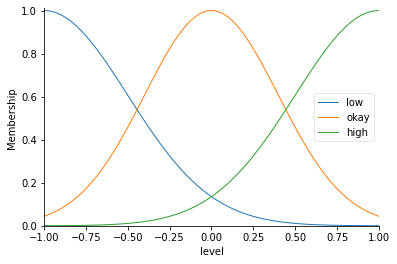

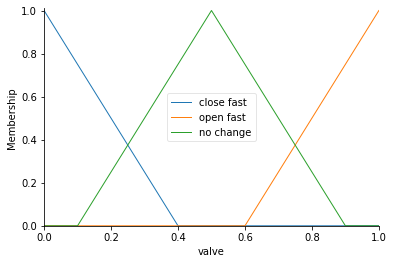

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

universe = np.linspace(-1, 1, 101)
universe1 = np.linspace(0, 1, 101)

level = ctrl.Antecedent(universe, 'level')
valve = ctrl.Consequent(universe1, 'valve')

          
level['low'] = fuzz.gaussmf(level.universe,-1,0.5)
level['okay'] = fuzz.gaussmf(level.universe,0,0.4) 
level['high'] = fuzz.gaussmf(level.universe,1,0.5)

valve['close fast'] = fuzz.trimf(valve.universe,[0, 0, 0.4])
valve['open fast'] = fuzz.trimf(valve.universe,[0.6, 1, 1])
valve['no change'] = fuzz.trimf(valve.universe,[0.1, 0.5, 0.9])

level.view()
valve.view()

rule0 = ctrl.Rule(antecedent = ((level['okay'])), consequent = valve['no change'], label = 'Rule okay')
rule1 = ctrl.Rule(antecedent = ((level['low'])), consequent = valve['open fast'], label = 'Rule ;ow')
rule2 = ctrl.Rule(antecedent = ((level['high'])), consequent = valve['close fast'], label = 'Rule okay')

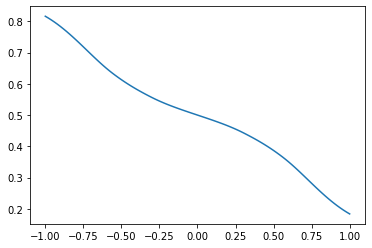

In [6]:
System  = ctrl.ControlSystem(rules = [rule0, rule1, rule2])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 101*101+1)
upSampled1 = np.linspace(-1,1,101)
upSampled2 = np.linspace(0,1,101)
#x,y = np.meshgrid(upSampled1, upSampled2)
x = np.linspace(-1,1,101)
z = np.zeros_like(x)
for i in range(101):
  sim.input['level']= x[i]
  sim.compute()
  z[i]=sim.output['valve']
plt.plot(x,z)